<a href="https://colab.research.google.com/github/Ananassio/Data-Science_lab/blob/main/week_4/Assignment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise : Naive  Bayes Classifier

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


* the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

In [3]:
np.shape(X)

(70000, 784)

In [4]:
X.to_numpy()[1,:].reshape((28,28)).shape
#np.array(X.iloc[1,:]).reshape((28,28)).shape

(28, 28)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [5]:
#randomly split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

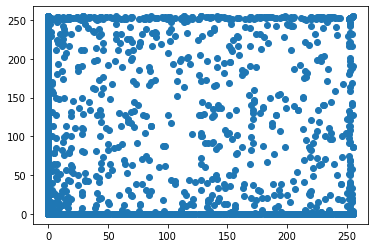

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots()
axes.scatter(X['pixel250'],X['pixel350'])



### E1.3: Train models on the train data.
Train a Bayes model with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)


In [7]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

### E1.4: Evaluate the model on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [8]:
from sklearn.metrics import accuracy_score
# use the accuracy function
accuracy_score(y_test,pred)

0.5605714285714286

In [9]:
from sklearn.metrics import f1_score
# use the f-Measure with average = macro
f1_score(y_test, pred, average='macro')

0.5100983166757722

In [10]:
# use the f-Measure with average = micro
f1_score(y_test, pred, average='micro')

0.5605714285714286

In [11]:
# use the f-Measure with average = weighted
f1_score(y_test, pred, average='weighted')

0.5195854371890511

plot a ROC curves





In [12]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)


SVC()

In [17]:
score = model.decision_function(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [14]:
score

array([[ 3.72238332,  1.71271646,  7.2641711 , ...,  2.72588565,
         9.31558078,  4.91205101],
       [ 0.69421712, -0.30574794,  1.70851147, ...,  7.29607991,
         6.24760551,  8.30699835],
       [ 0.71260392, -0.2904409 ,  2.78023386, ...,  2.73339756,
         9.30622124,  6.21374579],
       ...,
       [ 2.80547172,  7.2698506 ,  9.31764968, ..., -0.31472733,
         5.28100382,  0.68907905],
       [ 1.73189452, -0.31244188,  5.19770573, ...,  4.8495433 ,
         3.82087014,  8.28598676],
       [-0.30710218,  1.7237793 ,  3.78709785, ...,  6.19175626,
         4.95579966,  8.30296717]])

In [20]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(X_test, score ,pos_label=5)

ValueError: ignored